In [2]:
import pandas as pd
import requests as request
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Addition of driver files
driver = webdriver.Firefox()

In [5]:
#input data for extracting data
input_df = pd.read_excel('input_data.xlsx')
input_df

,Product,Amazon_link,Amazon_price_xpath,Amazon_rating_xpath,Amazon_rating_count_xpath,Flipkart_link,Flipkart_price_xpath,Flipkart_rating_xpath,Flipkart_rating_count_xpath
0,Apple iPhone 13 (512GB) - Blue,https://www.amazon.in/Apple-iPhone-13-512GB-Bl...,"//*[@id=""corePrice_desktop""]/div/table/tbody/t...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/apple-iphone-13-blue-...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
1,Apple iPhone 12 (64GB) - Blue,https://www.amazon.in/New-Apple-iPhone-12-64GB...,"//*[@id=""corePrice_desktop""]/div/table/tbody/t...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/apple-iphone-12-black...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
2,Redmi 10 Prime (128 GB),https://www.amazon.in/Redmi-10-Prime-extendabl...,"//*[@id=""corePrice_desktop""]/div/table/tbody/t...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/redmi-10-prime-astral...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
3,boAt Rockerz 330 Bluetooth Wireless,https://www.amazon.in/boAt-Rockerz-330-Bluetoo...,"//*[@id=""corePriceDisplay_desktop_feature_div""...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/boat-rockerz-255-pro-...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
4,OnePlus Buds Z2 | Pearl White,https://www.amazon.in/OnePlus-Wireless-Earbuds...,"//*[@id=""corePriceDisplay_desktop_feature_div""...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/oneplus-buds-z2-activ...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
5,Logitech G102 Light Sync Gaming Mouse,https://www.amazon.in/Logitech-G102-Customizab...,"//*[@id=""corePriceDisplay_desktop_feature_div""...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/logitech-g102-light-s...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
6,Dell Pro MS5120W Wireless mouse,https://www.amazon.in/Dell-Mobile-Wireless-Mou...,"//*[@id=""corePriceDisplay_desktop_feature_div""...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/dell-ms5120w-wireless...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
7,Logitech MK215 Wireless Keyboard and Mouse Combo,https://www.amazon.in/Logitech-MK215-Wireless-...,"//*[@id=""corePrice_desktop""]/div/table/tbody/t...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...","//*[@id=""reviewsMedley""]/div/div[1]/div[2]/div...",https://www.flipkart.com/logitech-mk235-mouse-...,"//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/...","//*[@id=""container""]/div/div[3]/div[1]/div[2]/..."
8,Seagate Expansion 1TB External HDD,https://www.amazon.in/Seagate-Expansion-1TB-Ex...,"//*[@id=""corePriceDisplay_desktop_feature_div""...","//*[@id="

In [6]:
#Output data in the form of dataframe
output_df = pd.DataFrame(columns = ['Product', 'Amazon_price', 'Amazon_rating', 'Amazon_rating_count', 'Flipkart_price', 'Flipkart_rating', 'Flipkart_rating_count'])

#log file
LOG_df = pd.DataFrame(columns = ['Product', 'Amazon_link', 'Amazon_price_xpath', 'Amazon_rating_xpath', 'Amazon_rating_count_xpath', 'Flipkart_link', 'Flipkart_price_xpath', 'Flipkart_rating_xpath', 'Flipkart_rating_count_xpath'])

In [7]:
for i in range(0,len(input_df['Product'])):
    ##########################################################################################################
    #Extract product data from amazon
    baseDataUrl = input_df['Amazon_link'][i]
    try:
        request.get(baseDataUrl)
    except request.ConnectionError:
        #print("Link Not Working")
        A_L = "UPDATE"
        A_price_X = "LINK NOT WORKING"
        A_price = "LINK NOT WORKING"
        A_rating_X = "LINK NOT WORKING"
        A_rating = "LINK NOT WORKING"
        A_rating_count_X = "LINK NOT WORKING"
        A_rating_count = "LINK NOT WORKING"
    else:
        print(str(input_df['Product'][i]) + " - AMAZON Link Working")
        A_L = "OKAY"
        driver.get(baseDataUrl)
        ###############################
        xpath = input_df['Amazon_price_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            A_price_X = "UPDATE"
            A_price = "XPATH NOT WORKING"
        else:
            print("Price xpath present")
            A_price_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            A_price = data.text
        #################################    
        xpath = input_df['Amazon_rating_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            A_rating_X = "UPDATE"
            A_rating = "XPATH NOT WORKING"
        else:
            print("Rating xpath present")
            A_rating_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            A_rating = data.text
        ##################################    
        xpath = input_df['Amazon_rating_count_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            A_rating_count_X = "UPDATE"
            A_rating_count = "XPATH NOT WORKING"
        else:
            print("Rating count xpath present")
            A_rating_count_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            A_rating_count = data.text
            
    ##################################################################################################################    
    #Extract product data from Flipkart
    baseDataUrl = input_df['Flipkart_link'][i]
    try:
        request.get(baseDataUrl)
    except request.ConnectionError:
        #print("Link Not Working")
        F_L = "UPDATE"
        F_price_X = "LINK NOT WORKING"
        F_price = "LINK NOT WORKING"
        F_rating_X = "LINK NOT WORKING"
        F_rating = "LINK NOT WORKING"
        F_rating_count_X = "LINK NOT WORKING"
        F_rating_count = "LINK NOT WORKING"
    else:
        print(str(input_df['Product'][i]) + " - FLIPKART Link Working")
        F_L = "OKAY"
        driver.get(baseDataUrl)
        #################################
        xpath = input_df['Flipkart_price_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            F_price_X = "UPDATE"
            F_price = "XPATH NOT WORKING"
        else:
            print("xpath present")
            F_price_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            F_price = data.text
        
        #################################    
        xpath = input_df['Flipkart_rating_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            F_rating_X = "UPDATE"
            F_rating = "XPATH NOT WORKING"
        else:
            print("Rating xpath present")
            F_rating_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            F_rating = data.text
        ##################################    
        xpath = input_df['Flipkart_rating_count_xpath'][i]
        #print(xpath)
        try:
            driver.find_element_by_xpath(xpath)
        except NoSuchElementException:
            print("No such xpath")
            F_rating_count_X = "UPDATE"
            F_rating_count = "XPATH NOT WORKING"
        else:
            print("Rating count xpath present")
            F_rating_count_X = "OKAY"
            data = driver.find_element_by_xpath(xpath)
            print(data.text)
            F_rating_count = data.text
            
 
    ##################################################################################################################      
   
    log_dic = {'Product':input_df['Product'][i], 
              'Amazon_link':[A_L],
              'Amazon_price_xpath':[A_price_X],
              'Amazon_rating_xpath' :[A_rating_X],
              'Amazon_rating_count_xpath' :[A_rating_count_X],
              'Flipkart_link':[F_L],
              'Flipkart_price_xpath':[F_price_X],
              'Flipkart_rating_xpath' :[F_rating_X],
              'Flipkart_rating_count_xpath' :[F_rating_count_X]}
    
    
    log_dic_df = pd.DataFrame(log_dic)
    
    
    merge = LOG_df.append(log_dic_df)
    LOG_df = merge
    
    ##################################################################################################################      
    #OUTPUT FILE 
    
    #Creating a Dictionary from extracted data
    extracted_dic = {'Product':input_df['Product'][i], 
              'Amazon_price':[A_price],
              'Amazon_rating':[A_rating],
              'Amazon_rating_count':[A_rating_count],
              'Flipkart_price':[F_price],
              'Flipkart_rating':[F_rating],
              'Flipkart_rating_count':[F_rating_count]}
    
    #Creating a dataframe from dictionary
    extracted_df = pd.DataFrame(extracted_dic)
    
    #Appending data to output dataframe
    merge = output_df.append(extracted_df)
    output_df = merge   

Apple iPhone 13 (512GB) - Blue - AMAZON Link Working


C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:32: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  data = driver.find_element_by_xpath(xpath)


Price xpath present
₹1,04,900.00


C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:39: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:47: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  data = driver.find_element_by_xpath(xpath)


Rating xpath present
4.7 out of 5
Rating count xpath present


C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:54: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:62: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  data = driver.find_element_by_xpath(xpath)


1,738 global ratings
Apple iPhone 13 (512GB) - Blue - FLIPKART Link Working


C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:88: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:96: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  data = driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:104: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:112: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  data = driver.find_element_by_xpath(xpath)
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/3241229245.py:119: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driv

xpath present
₹1,04,900
Rating xpath present
4.6
Rating count xpath present
4,347 Ratings &
Apple iPhone 12 (64GB) - Blue - AMAZON Link Working
Price xpath present
₹54,900.00
Rating xpath present
4.6 out of 5
Rating count xpath present
14,228 global ratings
Apple iPhone 12 (64GB) - Blue - FLIPKART Link Working
xpath present
₹56,999
Rating xpath present
4.6
Rating count xpath present
1,69,284 Ratings &
Redmi 10 Prime (128 GB) - AMAZON Link Working
Price xpath present
₹14,499.00
Rating xpath present
4.1 out of 5
Rating count xpath present
38,259 global ratings
Redmi 10 Prime (128 GB) - FLIPKART Link Working
No such xpath
Rating xpath present
4.2
Rating count xpath present
2,731 Ratings &
boAt Rockerz 330 Bluetooth Wireless - AMAZON Link Working
No such xpath
Rating xpath present
4.1 out of 5
Rating count xpath present
71,217 global ratings
boAt Rockerz 330 Bluetooth Wireless - FLIPKART Link Working
No such xpath
No such xpath
No such xpath
OnePlus Buds Z2 | Pearl White - AMAZON Link Work

In [8]:
#Save Log dataframe in form excel or CSV
LOG_df.to_excel('log.xlsx', index = False)

#Save output dataframe in form excel or CSV
output_df.to_excel('output.xlsx', index = False)

In [18]:
#Read extracted data for filtering out garbage data
output_df = pd.read_excel('Book1.xlsx')
output_df

,Product,Amazon_price,Amazon_rating,Amazon_rating_count,Flipkart_price,Flipkart_rating,Flipkart_rating_count
0,Apple iPhone 13 (512GB) - Blue,"₹1,05,900",4 out of 5,3 global ratings,"₹1,04,900",4.7,"2,743 Ratings &"
1,Apple iPhone 12 (64GB) - Blue,"₹53,999.00",4.6 out of 5,"11,155 global ratings","₹59,999",4.6,"1,65,417 Ratings &"
2,Redmi 10 Prime (128 GB),"₹14,999.00",4.1 out of 5,"32,108 global ratings","₹15,450",4.2,"2,449 Ratings &"
3,boAt Rockerz 330 Bluetooth Wireless,"₹1,499",4.1 out of 5,"63,781 global ratings","₹1,449",4.2,"2,80,802 Ratings &"
4,OnePlus Buds Z2 | Pearl White,"4,999",4.3 out of 5,"2,308 global ratings","₹4,949",4.3,"4,526 Ratings &"
5,Logitech G102 Light Sync Gaming Mouse,"1,495",4.6 out of 5,"6,316 global ratings","₹1,445",4.6,"3,320 Ratings &"
6,Dell Pro MS5120W Wireless mouse,"2,057",4.3 out of 5,89 global ratings,"₹2,149",4.3,43 Ratings &
7,Logitech MK215 Wireless Keyboard and Mouse Combo,"₹1,195.00",4.2 out of 5,"21,044 global ratings","₹1,099",4.3,"17,456 Ratings &"
8,Seagate Expansion 1TB External HDD,"3,899.00",4.4 out of 5,"1,17,667 global ratings","₹3,799",4.4,"67,112 Ratings &"
9,Apple 20W USB-C Power Adapter,"1,899",4.6 out of 5,"34,967 global ratings","₹1,149",3.9,58 Ratings &


In [19]:
for i in range(0,len(output_df['Product'])):
    #print(output_df['Product'][i])
    ###################
    if output_df['Amazon_price'][i] == "XPATH NOT WORKING":
        output_df['Amazon_price'][i] = 0
    else:
        output_df['Amazon_price'][i] = output_df['Amazon_price'][i].replace(".00","")
        output_df['Amazon_price'][i] = output_df['Amazon_price'][i].replace("₹","")
        output_df['Amazon_price'][i] = output_df['Amazon_price'][i].replace(",","")
        output_df['Amazon_price'][i] = int(output_df['Amazon_price'][i])
        
    ########################    
    if output_df['Amazon_rating'][i] == "XPATH NOT WORKING":
        output_df['Amazon_rating'][i] = 0
    else:
        output_df['Amazon_rating'][i] = output_df['Amazon_rating'][i].replace(" out of 5","")
        output_df['Amazon_rating'][i] = float(output_df['Amazon_rating'][i])
        
    ########################    
    if output_df['Amazon_rating_count'][i] == "XPATH NOT WORKING":
        output_df['Amazon_rating_count'][i] = 0
    else:
        output_df['Amazon_rating_count'][i] = output_df['Amazon_rating_count'][i].replace(" global ratings","")
        output_df['Amazon_rating_count'][i] = output_df['Amazon_rating_count'][i].replace(",","")
        output_df['Amazon_rating_count'][i] = int(output_df['Amazon_rating_count'][i])

    ########################    
    if output_df['Flipkart_price'][i] == "XPATH NOT WORKING":
        output_df['Flipkart_price'][i] = 0
    else:
        output_df['Flipkart_price'][i] = output_df['Flipkart_price'][i].replace(",","")
        output_df['Flipkart_price'][i] = output_df['Flipkart_price'][i].replace("₹","")
        output_df['Flipkart_price'][i] = int(output_df['Flipkart_price'][i])
        
    ########################    
    if output_df['Flipkart_rating'][i] == "XPATH NOT WORKING":
        output_df['Flipkart_rating'][i] = 0
    else:
        output_df['Flipkart_rating'][i] = float(output_df['Flipkart_rating'][i])
        
    ########################    
    if output_df['Flipkart_rating_count'][i] == "XPATH NOT WORKING":
        output_df['Flipkart_rating_count'][i] = 0
    else:
        output_df['Flipkart_rating_count'][i] = output_df['Flipkart_rating_count'][i].replace(" Ratings &","")
        output_df['Flipkart_rating_count'][i] = output_df['Flipkart_rating_count'][i].replace(",","")
        output_df['Flipkart_rating_count'][i] = int(output_df['Flipkart_rating_count'][i])

C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/2232841616.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['Amazon_price'][i] = output_df['Amazon_price'][i].replace(".00","")
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/2232841616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_df['Amazon_price'][i] = output_df['Amazon_price'][i].replace("₹","")
C:\Users\Akshat\AppData\Local\Temp/ipykernel_1308/2232841616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [20]:
output_df.to_excel('filtered_output.xlsx', index = False)
#output_df

In [21]:
#Read Filtered output
f_output_df = pd.read_excel('filtered_output.xlsx')
f_output_df

,Product,Amazon_price,Amazon_rating,Amazon_rating_count,Flipkart_price,Flipkart_rating,Flipkart_rating_count
0,Apple iPhone 13 (512GB) - Blue,105900,4.0,3,104900,4.7,2743
1,Apple iPhone 12 (64GB) - Blue,53999,4.6,11155,59999,4.6,165417
2,Redmi 10 Prime (128 GB),14999,4.1,32108,15450,4.2,2449
3,boAt Rockerz 330 Bluetooth Wireless,1499,4.1,63781,1449,4.2,280802
4,OnePlus Buds Z2 | Pearl White,4999,4.3,2308,4949,4.3,4526
5,Logitech G102 Light Sync Gaming Mouse,1495,4.6,6316,1445,4.6,3320
6,Dell Pro MS5120W Wireless mouse,2057,4.3,89,2149,4.3,43
7,Logitech MK215 Wireless Keyboard and Mouse Combo,1195,4.2,21044,1099,4.3,17456
8,Seagate Expansion 1TB External HDD,3899,4.4,117667,3799,4.4,67112
9,Apple 20W USB-C Power Adapter,1899,4.6,34967,1149,3.9,58


In [22]:
best_price_df = pd.DataFrame(columns = ['Product', 'Best_price', 'Marketplace'])

for i in range(0,len(f_output_df['Product'])):
    #print(f_output_df['Amazon_price'][i])
    A = f_output_df['Amazon_price'][i]
    F = f_output_df['Flipkart_price'][i]
    
    if A<=F:
        Best_price = A
        Marketplace = "Amazon"
    else:
        Best_price = F
        Marketplace = "Flipkart"
        
    inter_dic = {'Product':f_output_df['Product'][i], 
              'Best_price':[Best_price],
              'Marketplace':[Marketplace]}
    
    #Creating a dataframe from dictionary
    inter_df = pd.DataFrame(inter_dic)
    
    #Appending data to best price dataframe
    merge = best_price_df.append(inter_df)
    best_price_df = merge   
        
best_price_df.to_excel('best_price_output.xlsx', index = False)
best_price_df = pd.read_excel('best_price_output.xlsx')
best_price_df

,Product,Best_price,Marketplace
0,Apple iPhone 13 (512GB) - Blue,104900,Flipkart
1,Apple iPhone 12 (64GB) - Blue,53999,Amazon
2,Redmi 10 Prime (128 GB),14999,Amazon
3,boAt Rockerz 330 Bluetooth Wireless,1449,Flipkart
4,OnePlus Buds Z2 | Pearl White,4949,Flipkart
5,Logitech G102 Light Sync Gaming Mouse,1445,Flipkart
6,Dell Pro MS5120W Wireless mouse,2057,Amazon
7,Logitech MK215 Wireless Keyboard and Mouse Combo,1099,Flipkart
8,Seagate Expansion 1TB External HDD,3799,Flipkart
9,Apple 20W USB-C Power Adapter,1149,Flipkart


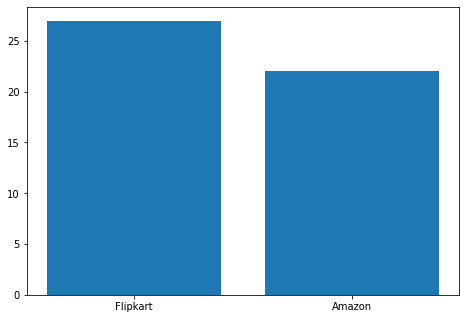

In [23]:
A_count = 0
F_count = 0
for i in range(0,len(best_price_df['Product'])):
    if str(best_price_df['Marketplace'][i]) == "Amazon":
        A_count+=1
    elif str(best_price_df['Marketplace'][i]) == "Flipkart":
        F_count+=1
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(best_price_df['Marketplace'].unique()).tolist()
y = [F_count,A_count]
ax.bar(x,y)
plt.show()

In [24]:
best_rating_df = pd.DataFrame(columns = ['Product', 'Best_rating', 'Marketplace'])

for i in range(0,len(f_output_df['Product'])):
    #print(f_output_df['Amazon_price'][i])
    A = f_output_df['Amazon_rating'][i]
    F = f_output_df['Flipkart_rating'][i]
    
    if A>=F:
        Best_rating = A
        Marketplace = "Amazon"
    else:
        Best_rating = F
        Marketplace = "Flipkart"
        
    inter_dic = {'Product':f_output_df['Product'][i], 
              'Best_rating':[Best_rating],
              'Marketplace':[Marketplace]}
    
    #Creating a dataframe from dictionary
    inter_df = pd.DataFrame(inter_dic)
    
    #Appending data to best price dataframe
    merge = best_rating_df.append(inter_df)
    best_rating_df = merge   
        
best_rating_df.to_excel('best_rating_output.xlsx', index = False)
best_rating_df = pd.read_excel('best_rating_output.xlsx')
best_rating_df

,Product,Best_rating,Marketplace
0,Apple iPhone 13 (512GB) - Blue,4.7,Flipkart
1,Apple iPhone 12 (64GB) - Blue,4.6,Amazon
2,Redmi 10 Prime (128 GB),4.2,Flipkart
3,boAt Rockerz 330 Bluetooth Wireless,4.2,Flipkart
4,OnePlus Buds Z2 | Pearl White,4.3,Amazon
5,Logitech G102 Light Sync Gaming Mouse,4.6,Amazon
6,Dell Pro MS5120W Wireless mouse,4.3,Amazon
7,Logitech MK215 Wireless Keyboard and Mouse Combo,4.3,Flipkart
8,Seagate Expansion 1TB External HDD,4.4,Amazon
9,Apple 20W USB-C Power Adapter,4.6,Amazon


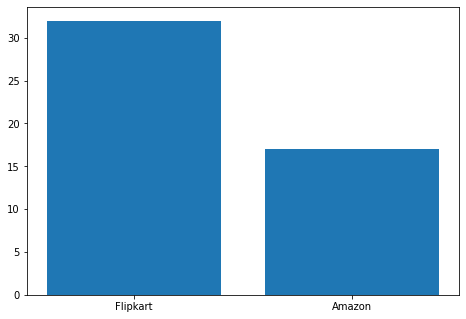

In [25]:
A_count = 0
F_count = 0
for i in range(0,len(best_rating_df['Product'])):
    if str(best_rating_df['Marketplace'][i]) == "Amazon":
        A_count+=1
    elif str(best_rating_df['Marketplace'][i]) == "Flipkart":
        F_count+=1
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(best_rating_df['Marketplace'].unique()).tolist()
y = [F_count,A_count]
ax.bar(x,y)
plt.show()

In [26]:
best_rating_count_df = pd.DataFrame(columns = ['Product', 'Best_rating_count', 'Marketplace'])

for i in range(0,len(f_output_df['Product'])):
    #print(f_output_df['Amazon_price'][i])
    A = f_output_df['Amazon_rating_count'][i]
    F = f_output_df['Flipkart_rating_count'][i]
    
    if A>=F:
        Best_rating_count = A
        Marketplace = "Amazon"
    else:
        Best_rating_count = F
        Marketplace = "Flipkart"
        
    inter_dic = {'Product':f_output_df['Product'][i], 
              'Best_rating_count':[Best_rating_count],
              'Marketplace':[Marketplace]}
    
    #Creating a dataframe from dictionary
    inter_df = pd.DataFrame(inter_dic)
    
    #Appending data to best price dataframe
    merge = best_rating_count_df.append(inter_df)
    best_rating_count_df = merge   
        
best_rating_count_df.to_excel('best_rating_count_output.xlsx', index = False)
best_rating_count_df = pd.read_excel('best_rating_count_output.xlsx')
best_rating_count_df

,Product,Best_rating_count,Marketplace
0,Apple iPhone 13 (512GB) - Blue,2743,Flipkart
1,Apple iPhone 12 (64GB) - Blue,165417,Flipkart
2,Redmi 10 Prime (128 GB),32108,Amazon
3,boAt Rockerz 330 Bluetooth Wireless,280802,Flipkart
4,OnePlus Buds Z2 | Pearl White,4526,Flipkart
5,Logitech G102 Light Sync Gaming Mouse,6316,Amazon
6,Dell Pro MS5120W Wireless mouse,89,Amazon
7,Logitech MK215 Wireless Keyboard and Mouse Combo,21044,Amazon
8,Seagate Expansion 1TB External HDD,117667,Amazon
9,Apple 20W USB-C Power Adapter,34967,Amazon


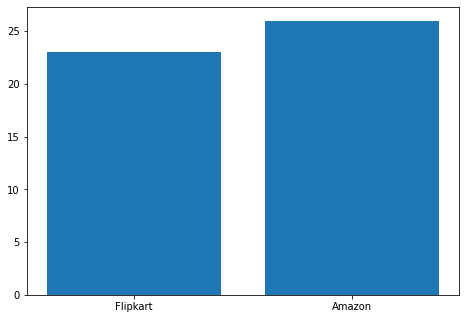

In [27]:
A_count = 0
F_count = 0
for i in range(0,len(best_rating_count_df['Product'])):
    if str(best_rating_count_df['Marketplace'][i]) == "Amazon":
        A_count+=1
    elif str(best_rating_count_df['Marketplace'][i]) == "Flipkart":
        F_count+=1
        
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(best_rating_count_df['Marketplace'].unique()).tolist()
y = [F_count,A_count]
ax.bar(x,y)
plt.show()